In [13]:
%matplotlib inline

Second-level fMRI model: a two-sample test 
==========================================

Full step-by-step example of fitting a GLM to perform a second level analysis
in experimental data and visualizing the results.

More specifically:

1. A sample of n=16 visual activity fMRIs are downloaded.
2. A two-sample t-test is applied to the brain maps in order to see
the effect of the contrast difference across subjects.

The contrast is between responses to vertical versus horizontal
checkerboards than are retinotopically distinct. At the individual
level, these stimuli are sometimes used to map the borders of primary
visual areas. At the group level, such a mapping is not possible. Yet,
we may observe some significant effects in these areas.




In [2]:
import pandas as pd
from nilearn import plotting
from nilearn.datasets import fetch_localizer_contrasts

Fetch dataset
--------------
We download a list of left vs right button press contrasts from a
localizer dataset.



In [3]:
n_subjects = 16
sample_vertical = fetch_localizer_contrasts(
    ["vertical checkerboard"], n_subjects, get_tmaps=True)
sample_horizontal = fetch_localizer_contrasts(
    ["horizontal checkerboard"], n_subjects, get_tmaps=True)

# What remains implicit here is that there is a one-to-one
# correspondence between the two samples: the first image of both
# samples comes from subject S1, the second from subject S2 etc.

Downloaded 7724161 of 7724161 bytes (100.0%,    0.0s remaining) ...done. (7 seconds, 0 min)
Extracting data from /home/jbart047/nilearn_data/brainomics_localizer/a282cc760b9231d775c606d2a52789a9/brainomics_data_2.zip..... done.
/home/data/cis/training-week-2019/env/lib/python3.6/site-packages/numpy/lib/npyio.py:2358: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


Downloaded 7722906 of 7722906 bytes (100.0%,    0.0s remaining) ...done. (6 seconds, 0 min)
Extracting data from /home/jbart047/nilearn_data/brainomics_localizer/9606d506c0d0ef19f01591d67c36f836/brainomics_data_1.zip..... done.


Estimate second level model
---------------------------
We define the input maps and the design matrix for the second level model
and fit it.



In [4]:
second_level_input = sample_vertical['cmaps'] + sample_horizontal['cmaps']

model the effect of conditions (sample 1 vs sample 2)



In [5]:
import numpy as np
condition_effect = np.hstack(([1] * n_subjects, [- 1] * n_subjects))

model the subject effect: each subject is observed in sample 1 and sample 2



In [6]:
subject_effect = np.vstack((np.eye(n_subjects), np.eye(n_subjects)))
subjects = ['S%02d' % i for i in range(1, n_subjects + 1)]

Assemble those in a design matrix



In [7]:
design_matrix = pd.DataFrame(
    np.hstack((condition_effect[:, np.newaxis], subject_effect)),
    columns=['vertical vs horizontal'] + subjects)

plot the design_matrix



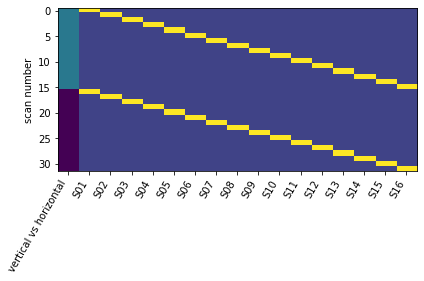

In [14]:
from nistats.reporting import plot_design_matrix
plot_design_matrix(design_matrix)
import matplotlib.pyplot as plt
plt.show()

formally specify the analysis model and fit it



In [15]:
from nistats.second_level_model import SecondLevelModel
second_level_model = SecondLevelModel().fit(
    second_level_input, design_matrix=design_matrix)

/home/data/cis/training-week-2019/env/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


Estimating the contrast is very simple. We can just provide the column
name of the design matrix.



In [16]:
z_map = second_level_model.compute_contrast('vertical vs horizontal',
                                            output_type='z_score')

We threshold the second level contrast and plot it



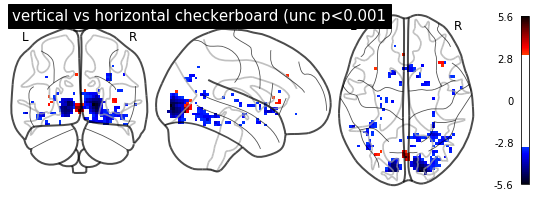

In [19]:
threshold = 3.1  # correponds to  p < .001, uncorrected
display = plotting.plot_glass_brain(
    z_map, threshold=threshold, colorbar=True, plot_abs=False,
    title='vertical vs horizontal checkerboard (unc p<0.001')
plotting.show()

Unsurprisingly, we see activity in the primary visual cortex, both positive and negative.

